# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:

* Binary classification
* Mutliclass classification
* Multilabel classification

## Creating data to view and fit

In [10]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create Circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [11]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [12]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [13]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [14]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

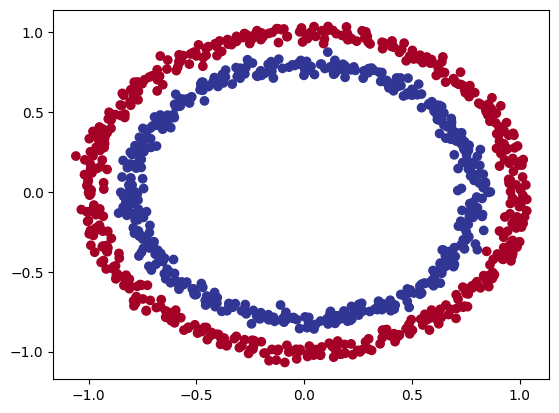

In [15]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [16]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [17]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [18]:
# How many samples we're woring
len(X), len(y)

(1000, 1000)

In [19]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [20]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.16.2'

In [21]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                              
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5


2024-12-16 11:23:15.592443: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-12-16 11:23:15.592471: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-16 11:23:15.592479: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-16 11:23:15.592830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-16 11:23:15.592849: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-12-16 11:23:15.977413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4722 - loss: 6.8050
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4708 - loss: 6.5873
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4718 - loss: 6.2234
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4462 - loss: 5.3195
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5316 - loss: 5.4043


In [22]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [23]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)                                                             
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [24]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4955 - loss: 0.6934


[0.6932258009910583, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [25]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                                             
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [26]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5113 - loss: 0.6913


[0.6954606771469116, 0.492000013589859]

To visulize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [27]:
import numpy as np

In [30]:
np_c = np.c_[np.array([1, 2, 3]), np.array([4, 5, 6])] # Stack 1-D arrays as columns into a 2-D array
np_c, np_c.shape

(array([[1, 4],
        [2, 5],
        [3, 6]]),
 (3, 2))

In [39]:
def plot_decision_boundary(model, X, y):
    """
        Plots the decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    X_min, X_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1 
    XX, yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                          np.linspace(y_min, y_max, 100)) # linspace -> evenly spaced numbers 
    # Create X value (we're going to make predictions on these)
    X_in = np.c_[XX.ravel(), yy.ravel()] # Stack 2D arrays together

    # Make predictions 
    y_pred = model.predict(X_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(XX.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(XX.shape)

    # Plot the decision boundary
    plt.contourf(XX, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(XX.min(), XX.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


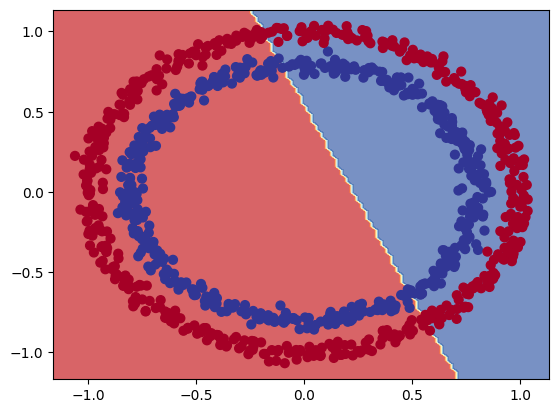

In [40]:
# Check out the predictions our model is making 
plot_decision_boundary(model=model_3,
                        X=X,
                        y=y)

In [41]:
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)


Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
  • training=True
  • mask=None

oh wait...We compile our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [42]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                                             
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 704.0446 - mae: 704.0446
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 585.7673 - mae: 585.7673
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 470.2681 - mae: 470.2681
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 355.1762 - mae: 355.1762
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 238.1159 - mae: 238.1159
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 116.9419 - mae: 116.9419
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 50.3793 - mae: 50.3793
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 85.7297 - mae: 85.7297
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 72.1385 - mae: 72.1385
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 44.5648 - mae: 44.5648
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 49.9345 - mae: 49.9345
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 40.2144 - mae: 40.2144
Epoch 13/100

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


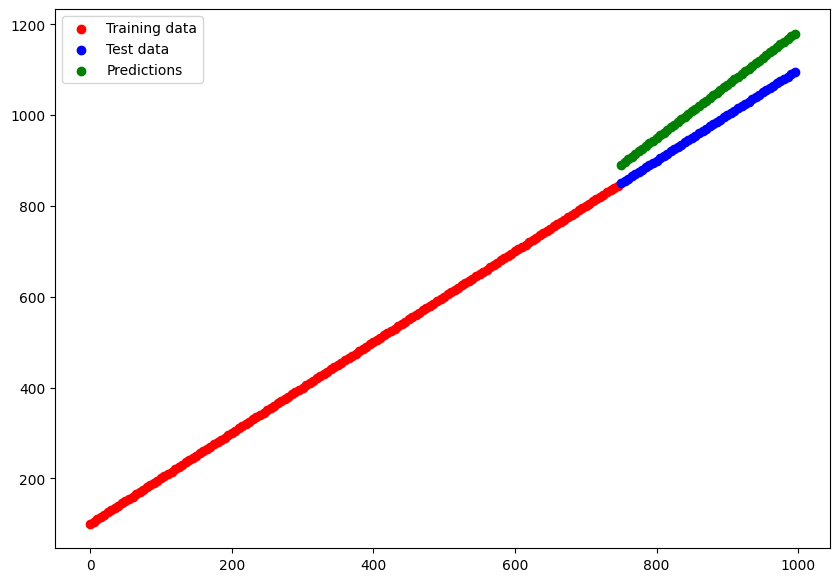

In [45]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="r", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="b", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="g", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [49]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4947 - loss: 5.3859
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4899 - loss: 5.3515
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4849 - loss: 5.2081
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4832 - loss: 5.1321
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4828 - loss: 5.0075
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4784 - loss: 4.8789
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4805 - loss: 4.8532
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4795 - loss: 4.7631
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4787 - loss: 4.7559
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4794 - loss: 4.7549
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4794 - loss: 4.7540
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

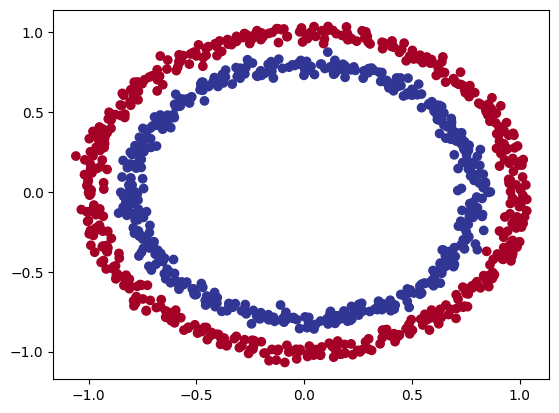

In [50]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


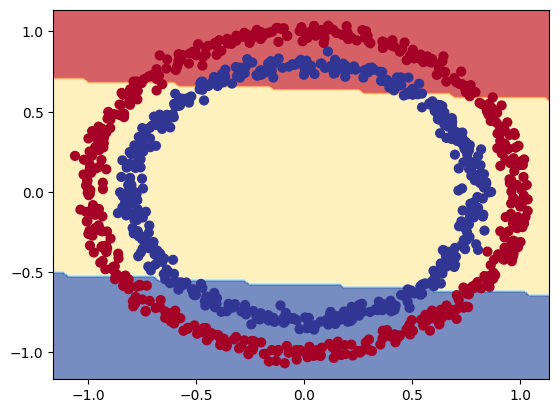

In [51]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

Let's try build our first neural network with a non-linear activation function.

In [52]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4827 - loss: 4.4503
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4794 - loss: 4.3660
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4661 - loss: 4.2437
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4610 - loss: 4.1962
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4525 - loss: 4.1673
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4500 - loss: 4.1578
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4451 - loss: 4.1512
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4409 - loss: 4.1287
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4327 - loss: 4.1144
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4327 - loss: 4.0979
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4262 - loss: 4.0337
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

In [60]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4569 - loss: 6.6353
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4527 - loss: 6.4869
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4519 - loss: 6.1743
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4589 - loss: 6.0074
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4531 - loss: 5.8732
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4554 - loss: 5.2799
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4531 - loss: 5.1440
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4523 - loss: 5.0525
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4531 - loss: 5.0421
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4531 - loss: 5.0369
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4524 - loss: 5.0318
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

In [61]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5340 - loss: 0.6933


[0.693942129611969, 0.5429999828338623]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


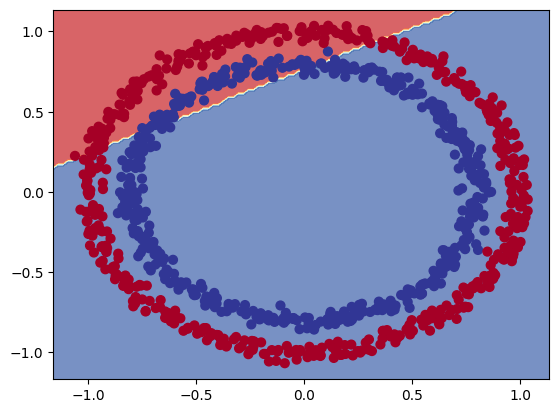

In [62]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)